In [1]:
import pandas as pd
import seaborn as sns # For Data Visualization
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as nm


In [2]:
!pip install colorama
from colorama import Fore, Back, Style

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [5]:
#Getting/reading data
test=pd.read_csv("testhr.csv")
train=pd.read_csv("trainhr.csv")

In [6]:
#Getting Shapes
print(f"Shape of testhr={test.shape}\nShape of trainhr={train.shape}")

Shape of testhr=(23490, 13)
Shape of trainhr=(54808, 14)


In [7]:
pd.set_option("display.max_rows",10)
pd.set_option("display.max_column",15)
pd.set_option("display.max_colwidth",10)
pd.set_option("display.width",2000)
test.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Techno...,region_26,Bachel...,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachel...,f,other,1,31,3.0,5,0,0,51
2,72255,Sales ...,region_13,Bachel...,m,other,1,31,1.0,4,0,0,47
3,38562,Procur...,region_2,Bachel...,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachel...,m,sourcing,1,30,4.0,7,0,0,61


In [8]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales ...,region_7,Master...,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operat...,region_22,Bachel...,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales ...,region_19,Bachel...,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales ...,region_23,Bachel...,m,other,2,39,1.0,10,0,0,50,0
4,48945,Techno...,region_26,Bachel...,m,other,1,45,3.0,2,0,0,73,0


In [9]:
train[(train.department == "Sales") & (train.age >= 30)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [10]:
test["department"]

0        Techno...
1               HR
2        Sales ...
3        Procur...
4          Finance
           ...    
23485        Legal
23486    Techno...
23487           HR
23488    Procur...
23489    Techno...
Name: department, Length: 23490, dtype: object

In [11]:
train["department"]

0        Sales ...
1        Operat...
2        Sales ...
3        Sales ...
4        Techno...
           ...    
54803    Techno...
54804    Operat...
54805    Analytics
54806    Sales ...
54807           HR
Name: department, Length: 54808, dtype: object

# •	Getting info of train

In [12]:
#GETTING INFO OF TRAIN

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# •	checking if there is any NULL value in the dataset

In [13]:
#•	checking if there is any NULL value in the dataset in train
train.isnull().any()

employee_id           False
department            False
region                False
education              True
gender                False
                      ...  
length_of_service     False
KPIs_met >80%         False
awards_won?           False
avg_training_score    False
is_promoted           False
Length: 14, dtype: bool

In [14]:
#getting sum of null quantities
train.isnull().sum()

employee_id              0
department               0
region                   0
education             2409
gender                   0
                      ... 
length_of_service        0
KPIs_met >80%            0
awards_won?              0
avg_training_score       0
is_promoted              0
Length: 14, dtype: int64

# ========= •	looking at the most popular departments   ============#

In [15]:
#THIS IS FOR THE TRAIN CASE
df1 = train.pivot_table(index = ['department'], aggfunc ='size')
print(df1)

department
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
Operations           11348
Procurement           7138
R&D                    999
Sales & Marketing    16840
Technology            7138
dtype: int64


In [16]:
#THE BELOW IS THE SORTED FOR THE MOST POPULAR DEPARTMENTS IN TRAIN CASE

In [17]:
sort_dep1=df1.sort_values(ascending=False)
sort_dep1

department
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
dtype: int64

#1)THE BELOW IS THE SORTED BAR GRAPH FOR # checking the Most Popular Departments in TRAIN.HR

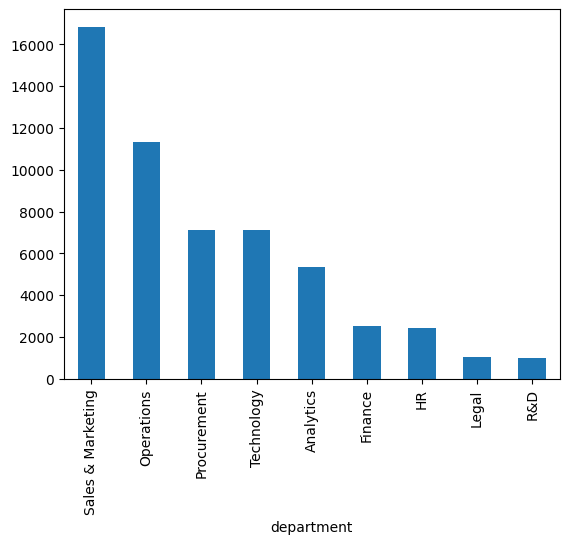

In [18]:
bargraph = sort_dep1.plot.bar(x = "department", y = "number of employees", fontsize="10")

In [19]:
#THE BELOW IS THE SORTED FOR THE MOST POPULAR DEPARTMENTS IN TEST CASE

In [20]:
df2=test["department"].value_counts()
df2

department
Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: count, dtype: int64

In [21]:
stopword=set(STOPWORDS)
#print(stopword)

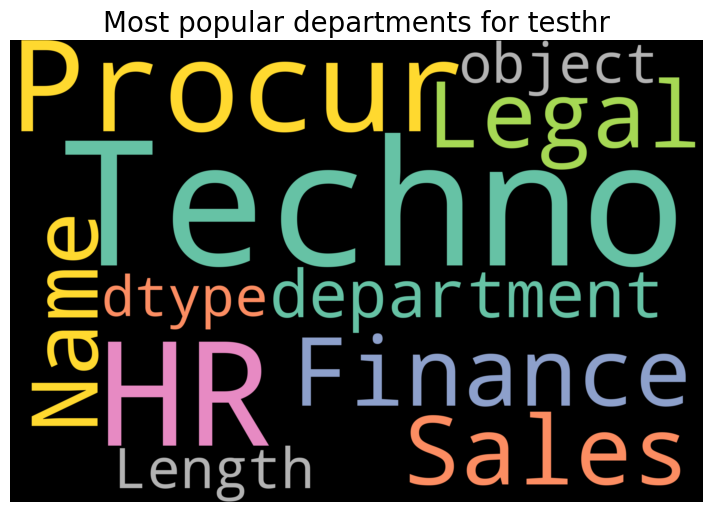

In [22]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(str(test["department"]))
# Display the generated image
plt.rcParams['figure.figsize']=(13,6)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most popular departments for testhr',fontsize=20)
plt.axis("off")
plt.grid()
plt.show()

# ======== •	checking the no. of Employees Promoted     ========#

In [23]:
promote=train["is_promoted"].value_counts()
print("\33[1;49;36m",promote)

 is_promoted
0    50140
1     4668
Name: count, dtype: int64


In [24]:
print(Fore.GREEN +"number of people got promoted are\33[4;36;91m", promote[1])

number of people got promoted are 4668


# •	finding the %age of people promoted and plot a scatter plot over data

In [25]:
per=(promote[1]/promote[0])*100
print(" \33[1;49;93m percentage of people promoted are \33[1;49;36m {:.2f}%".format(per))

  percentage of people promoted are  9.31%


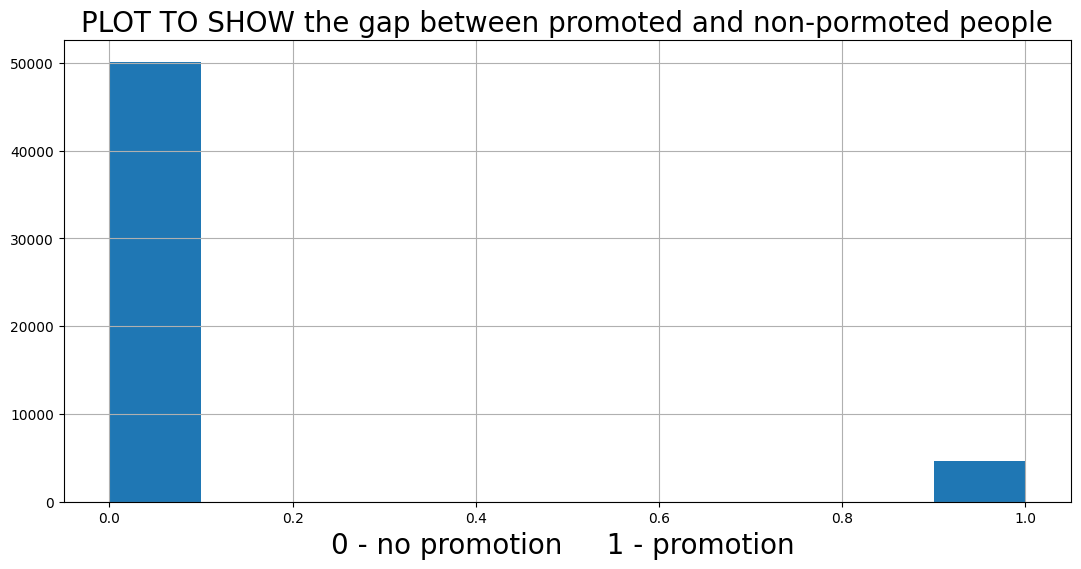

In [26]:
plt.hist(train["is_promoted"])
plt.title("PLOT TO SHOW the gap between promoted and non-pormoted people",fontsize=20)
plt.xlabel("0 - no promotion     1 - promotion ",fontsize=20)
plt.grid()
plt.show()

In [27]:
x=train["avg_training_score"] 
y=train["is_promoted"]
z=[]
for i in range(len(y)):
    if y[i]==1:
        z.append(x[i])
print("the below is the average score of the people who were promoted\n")
count=pd.Series(z).value_counts()
print(count)


the below is the average score of the people who were promoted

82    151
81    149
61    146
59    145
60    138
     ... 
45     31
44     10
43      7
42      2
41      1
Name: count, Length: 59, dtype: int64


# •	checking the distribution of the avg_training score of the Employees==#

In [29]:
avg_sc=train["avg_training_score"].value_counts()
print(avg_sc)

avg_training_score
50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: count, Length: 61, dtype: int64


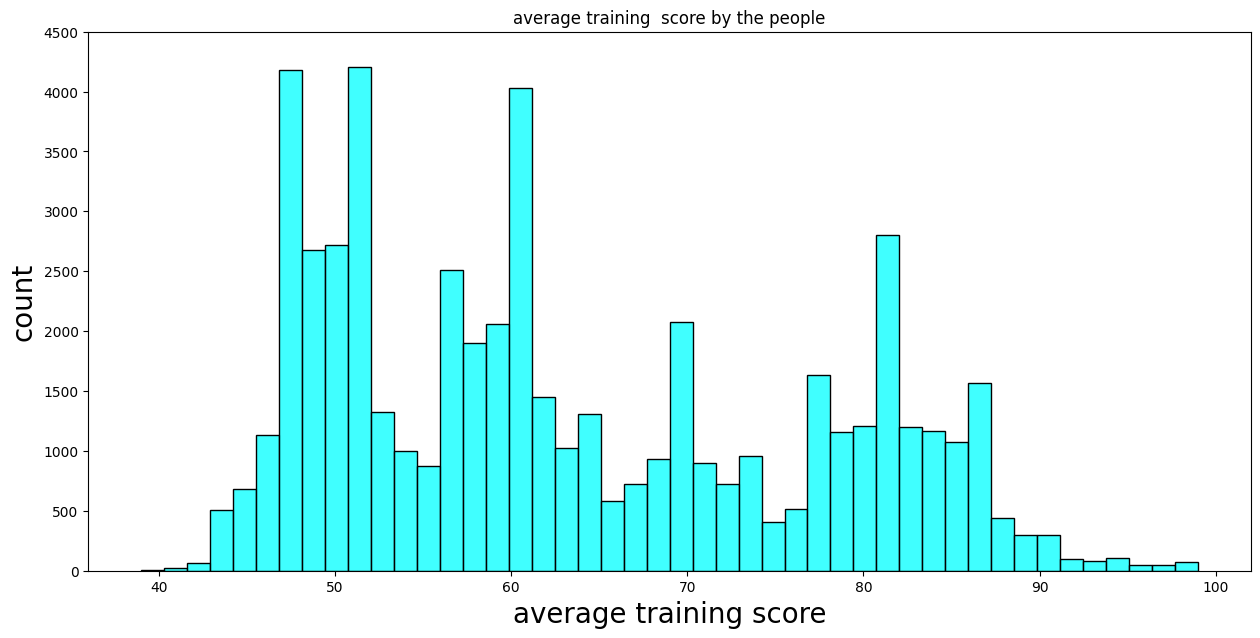

In [30]:
#this is the average training score of trainhr case
plt.rcParams["figure.figsize"]=(15,7)
sns.histplot(train["avg_training_score"],color="cyan")
plt.title("average training  score by the people")
plt.xlabel("average training score",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.ylim(0, 4500)
plt.show()


=========================#the below is the distribution of average training score in test hr case=============================

In [31]:
avg_sc2=test["avg_training_score"].value_counts(ascending=True)
avg_sc2

avg_training_score
39       1
40       3
41      11
99      13
98      14
      ... 
60     889
51    1023
48    1084
49    1144
50    1227
Name: count, Length: 61, dtype: int64

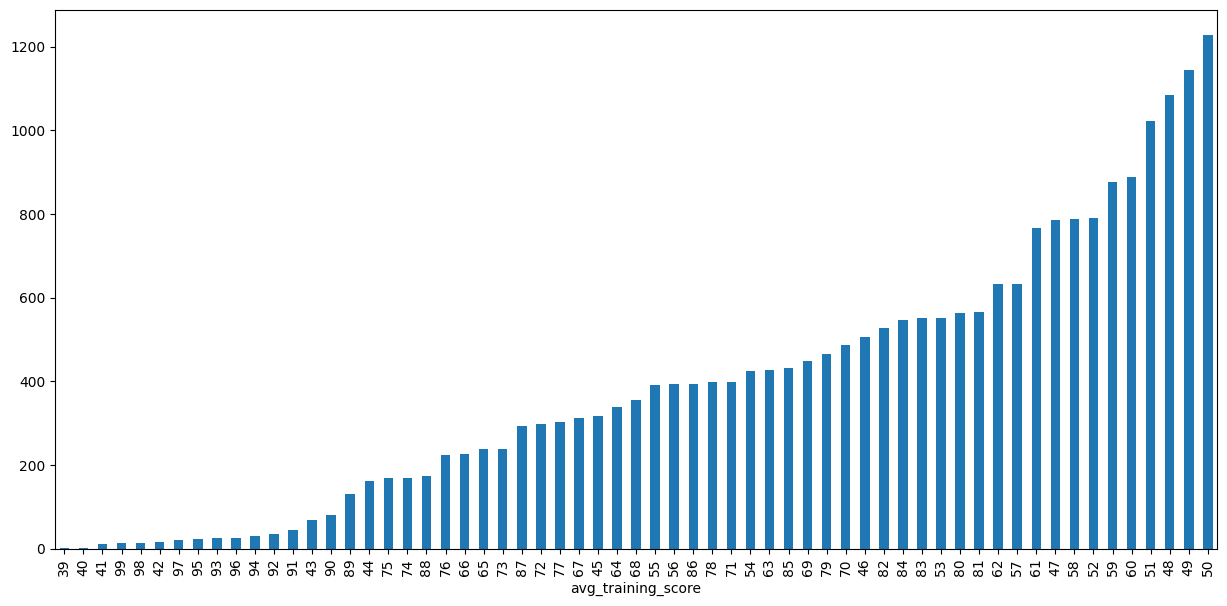

In [32]:
bargraph3 = avg_sc2.plot.bar(x = "average training score", y = "number of employees got ", fontsize="10")

# ==== •	Counting the number of persons who have won the award======

In [33]:
award=train["awards_won?"].value_counts()
award

awards_won?
0    53538
1     1270
Name: count, dtype: int64

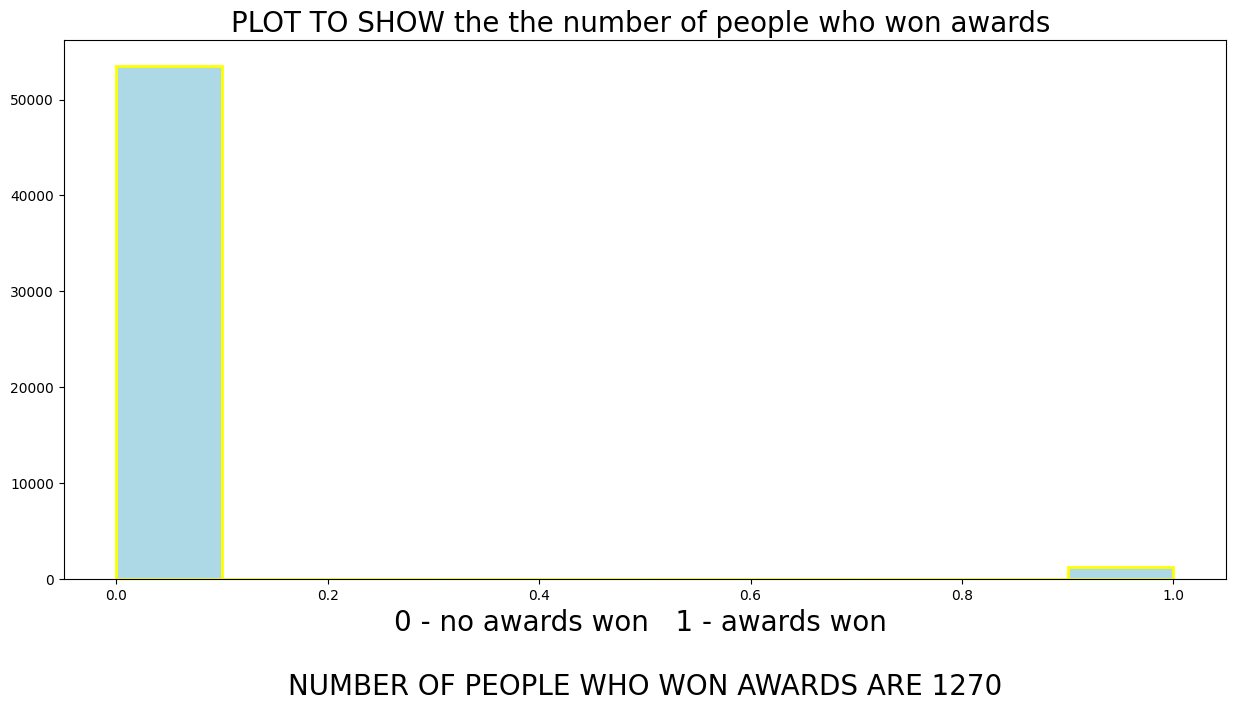

In [34]:
plt.hist(train["awards_won?"],color=["lightblue"], ec="yellow",lw=2)
plt.title("PLOT TO SHOW the the number of people who won awards ",fontsize=20)
plt.xlabel(f"0 - no awards won   1 - awards won \n\nNUMBER OF PEOPLE WHO WON AWARDS ARE {award[1]}",fontsize=20,)
plt.show()

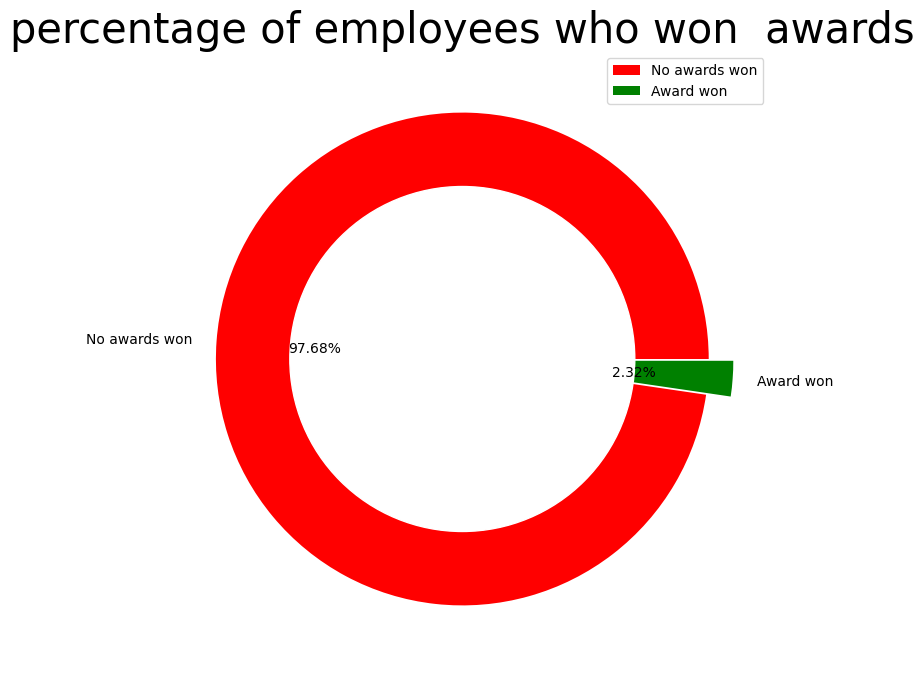

In [35]:
#Plot a donut  chart for visualizing %age of emp who won award
size=train['awards_won?'].value_counts()
colors=['red','green']
exp=[0,.1]
labels=("No awards won","Award won")
circle=plt.Circle((0,0),0.7,color='white')
plt.rcParams['figure.figsize']=(8,8)
plt.pie(size,labels=labels,colors=colors,autopct="%0.2f%%",explode=exp)
plt.title("percentage of employees who won  awards",fontsize=30)
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

# ======•	checking the distribution of length of service=======#

In [36]:
service=train["length_of_service"].value_counts()
service

length_of_service
3     7033
4     6836
2     6684
5     5832
7     5551
      ... 
30      12
32      10
33       9
34       4
37       1
Name: count, Length: 35, dtype: int64

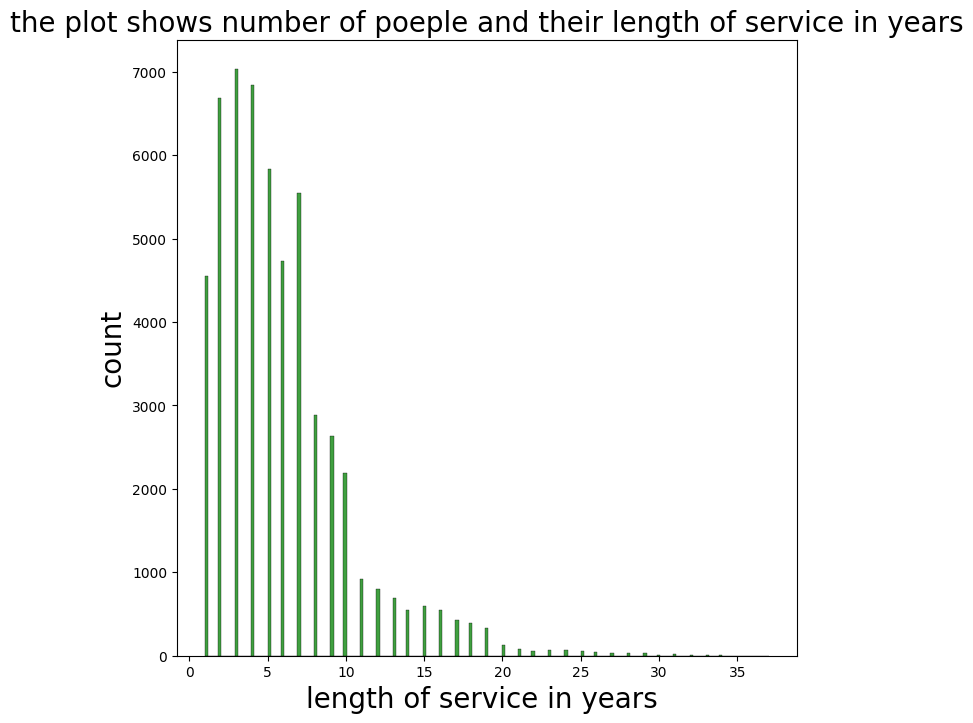

In [37]:
sns.histplot(train["length_of_service"],color="green")
plt.title("the plot shows number of poeple and their length of service in years",fontsize=20)
plt.xlabel("length of service in years ",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()



C:\Users\DEVANSH SINGH TOMAR\AppData\Local\Temp\ipykernel_17520\839881534.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["length_of_service"], kde = True, color ='red', bins = 34,hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0,})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


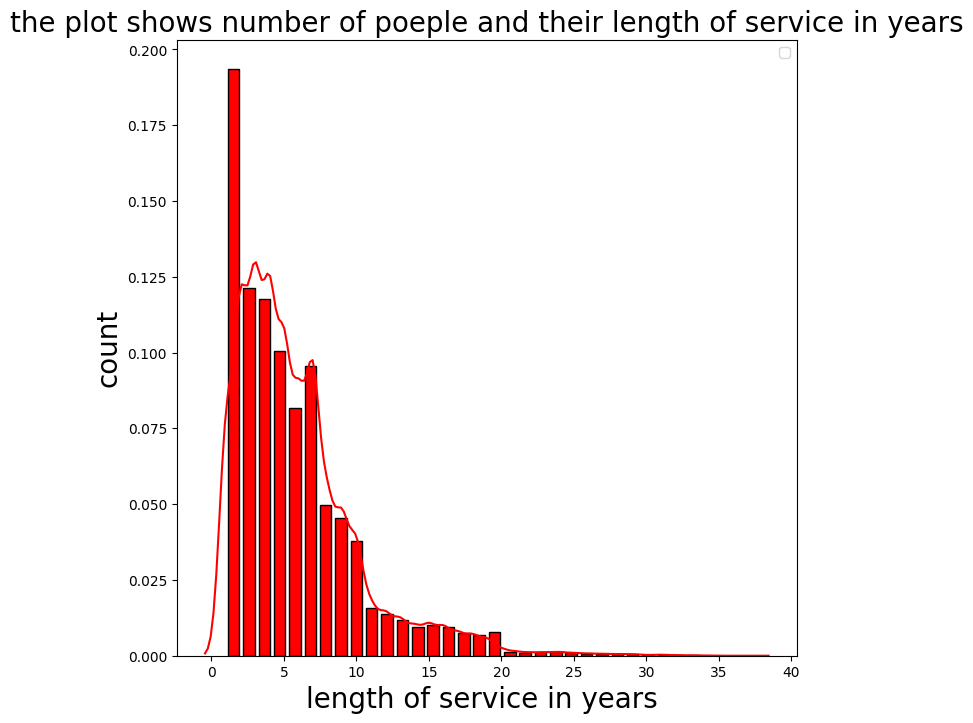

In [38]:
#using distplot to plot the desity as well

sns.distplot(train["length_of_service"], kde = True, color ='red', bins = 34,hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0,})
plt.title("the plot shows number of poeple and their length of service in years",fontsize=20)
plt.xlabel("length of service in years ",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.legend()
plt.show()

# •	checking the distribution of age of Employees in the company =======

In [39]:
years=train["age"]
years

0        35
1        30
2        34
3        39
4        45
         ..
54803    48
54804    37
54805    27
54806    29
54807    27
Name: age, Length: 54808, dtype: int64

In [40]:
age=years.value_counts()
age

age
30    3665
32    3534
31    3534
29    3405
33    3210
      ... 
60     217
58     213
59     209
20     113
21      98
Name: count, Length: 41, dtype: int64

In [41]:
years2=test["age"].value_counts(ascending=True)
years2

age
21      39
20      51
59      83
60      89
57      95
      ... 
33    1387
29    1456
32    1481
31    1526
30    1595
Name: count, Length: 41, dtype: int64

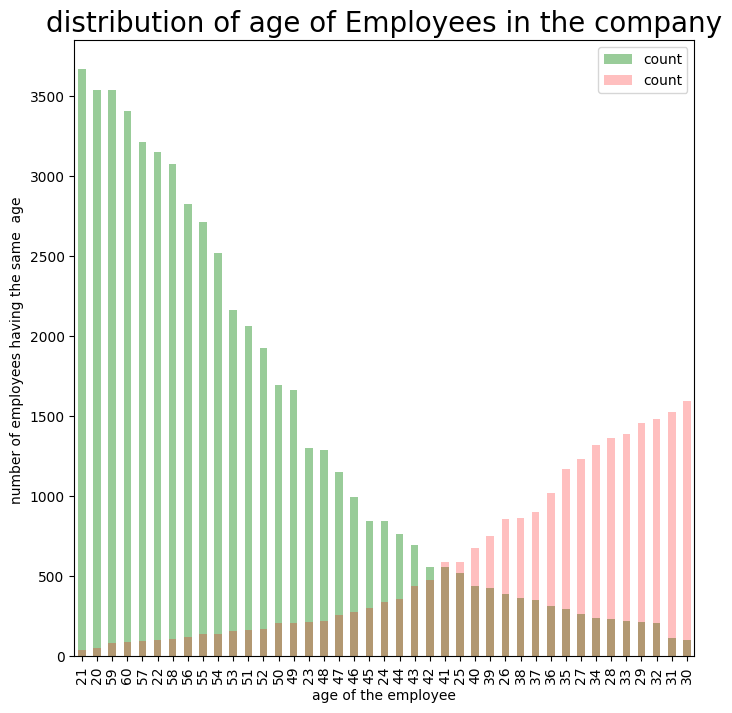

In [42]:
bargraph4 = age.plot.bar(x = "age of the employee", y = "number of employees having the same  age ", fontsize="10",color="g",width=.5,alpha=0.40)
bargraph5 = years2.plot.bar(x = "age of the employee", y = "number of employees having the same  age  ", fontsize="10",color="r",width=.5,alpha=0.25)
plt.legend()
plt.xlabel('age of the employee')
plt.ylabel('number of employees having the same  age ')
plt.title("distribution of age of Employees in the company",fontsize=20)
# Print the  bar graph
plt.show()

# •	checking the different no. of training done by the employees========

In [43]:
training_years1=train["no_of_trainings"].value_counts()


In [44]:
training_years2=test["no_of_trainings"].value_counts()
training_years2

no_of_trainings
1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
8        2
9        2
Name: count, dtype: int64

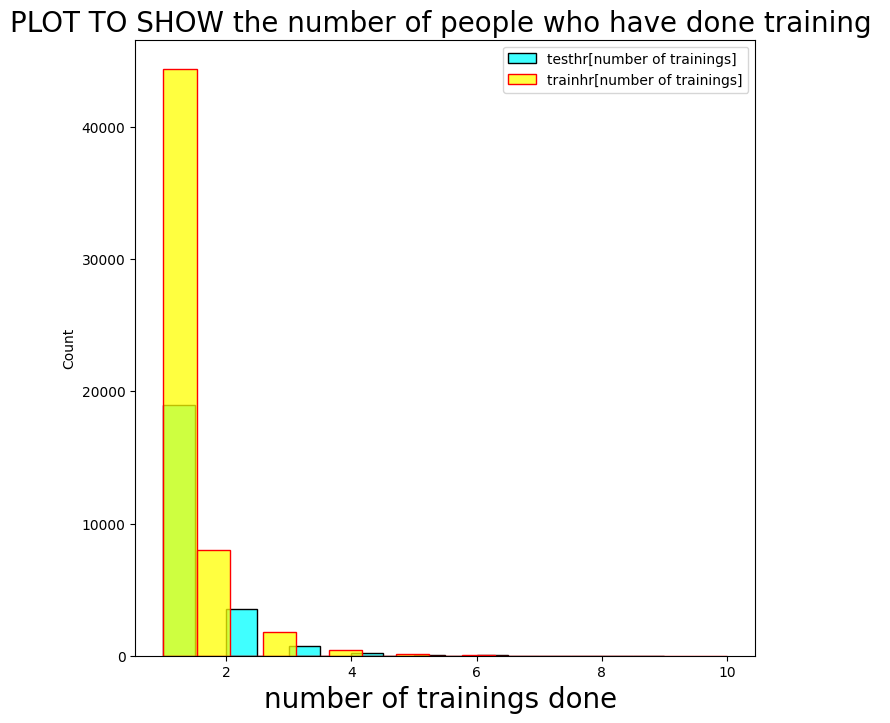

In [46]:
sns.histplot(test["no_of_trainings"],color="cyan",ec="black",lw=1)
sns.histplot(train["no_of_trainings"],color="yellow",ec="red",lw=1)
plt.title("PLOT TO SHOW the number of people who have done training ",fontsize=20)
plt.xlabel(f"number of trainings done ",fontsize=20,)
labels=("testhr[number of trainings]","trainhr[number of trainings]")
plt.legend(labels=labels)
plt.show()

# •	checking/ the different types of recruitment channels for the company

In [48]:
size = train['recruitment_channel'].value_counts()
size

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

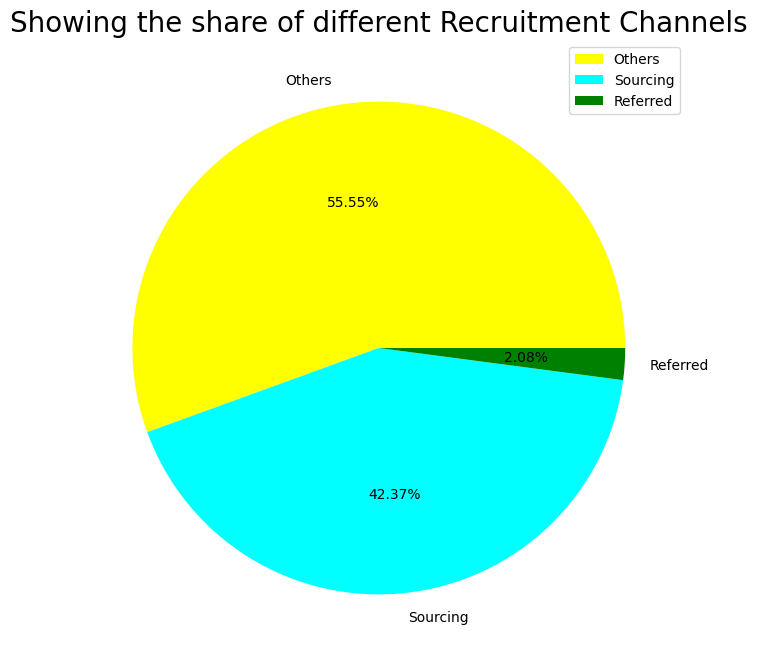

In [81]:
#the different types of recruitment channels for the company
colors = ['yellow', 'cyan', 'green']
labels = ("Others", "Sourcing", "Referred")
circle = plt.Circle((0, 0), 0.7, color = 'white')
exp=[0,0,0]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels,  autopct = '%.2f%%',explode=exp)
plt.title('Showing the share of different Recruitment Channels', fontsize = 20)
plt.legend()
plt.show()

# •	checking the most popular education degree among the employees

In [85]:
size1 = train['education'].value_counts()
size1

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

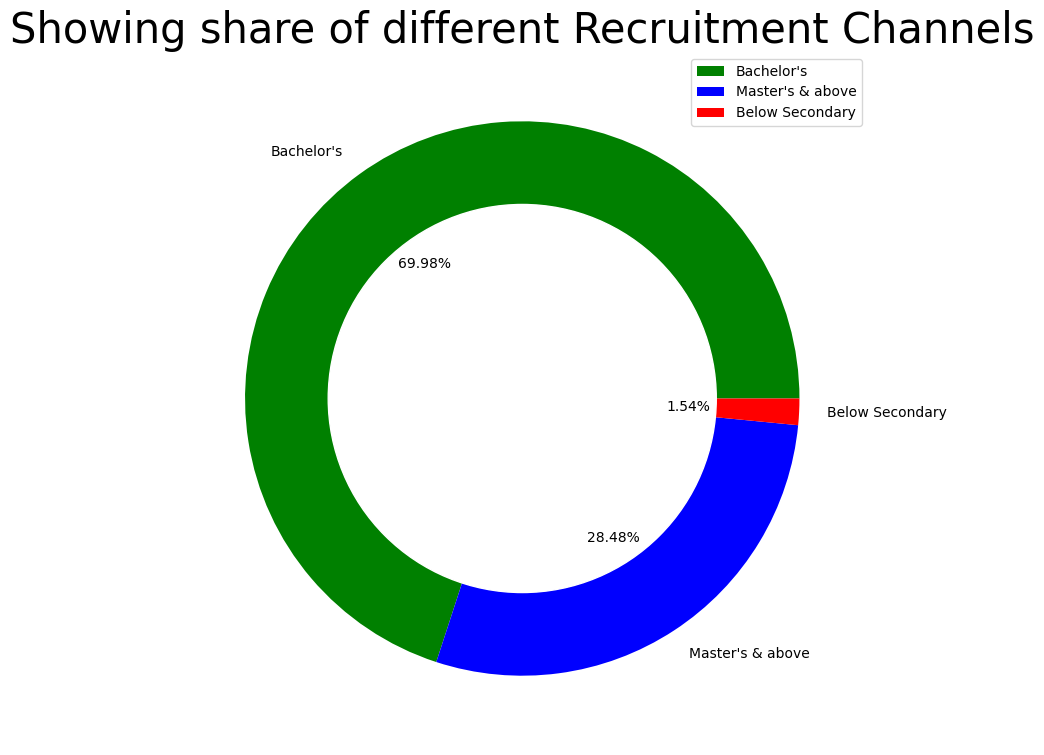

In [90]:
colors = ['green', 'blue', 'red']
labels = ("Bachelor's", "Master's & above", "Below Secondary")

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels,  autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

# ===================== •	checking the gender gap ============

In [92]:
#Checking the gender gap
gender = train['gender'].value_counts()
gender

gender
m    38496
f    16312
Name: count, dtype: int64

In [93]:
gender2 = test['gender'].value_counts()
gender2

gender
m    16596
f     6894
Name: count, dtype: int64

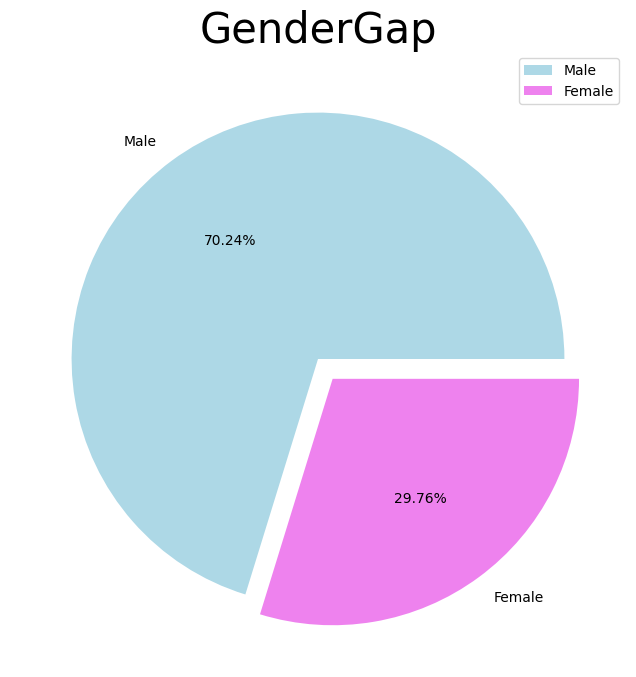

In [113]:
labels = ("Male", "Female")
colors=("lightblue","violet")
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(gender, labels = labels,colors=colors ,explode = explode,  autopct = "%.2f%%")
plt.title('GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

# •	checking the different regions of the company===========#

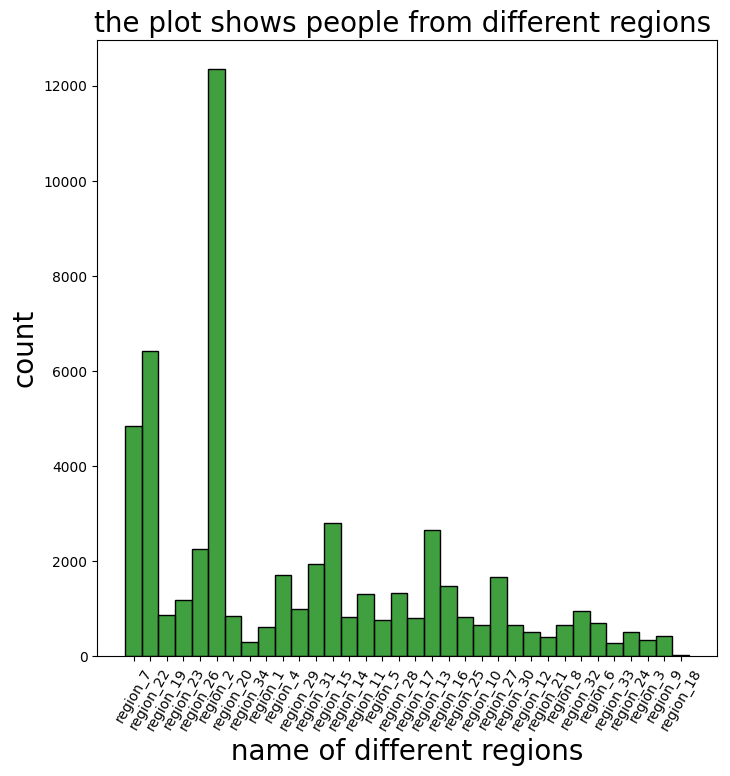

In [109]:
sns.histplot(train["region"],color="green")
plt.title("the plot shows people from different regions ",fontsize=20)
plt.xlabel(" name of different regions ",fontsize=20)
plt.xticks(rotation = 60)
plt.ylabel("count",fontsize=20)
plt.show()


# •	scatter plot between average training score and is_promoted

<Axes: xlabel='avg_training_score'>

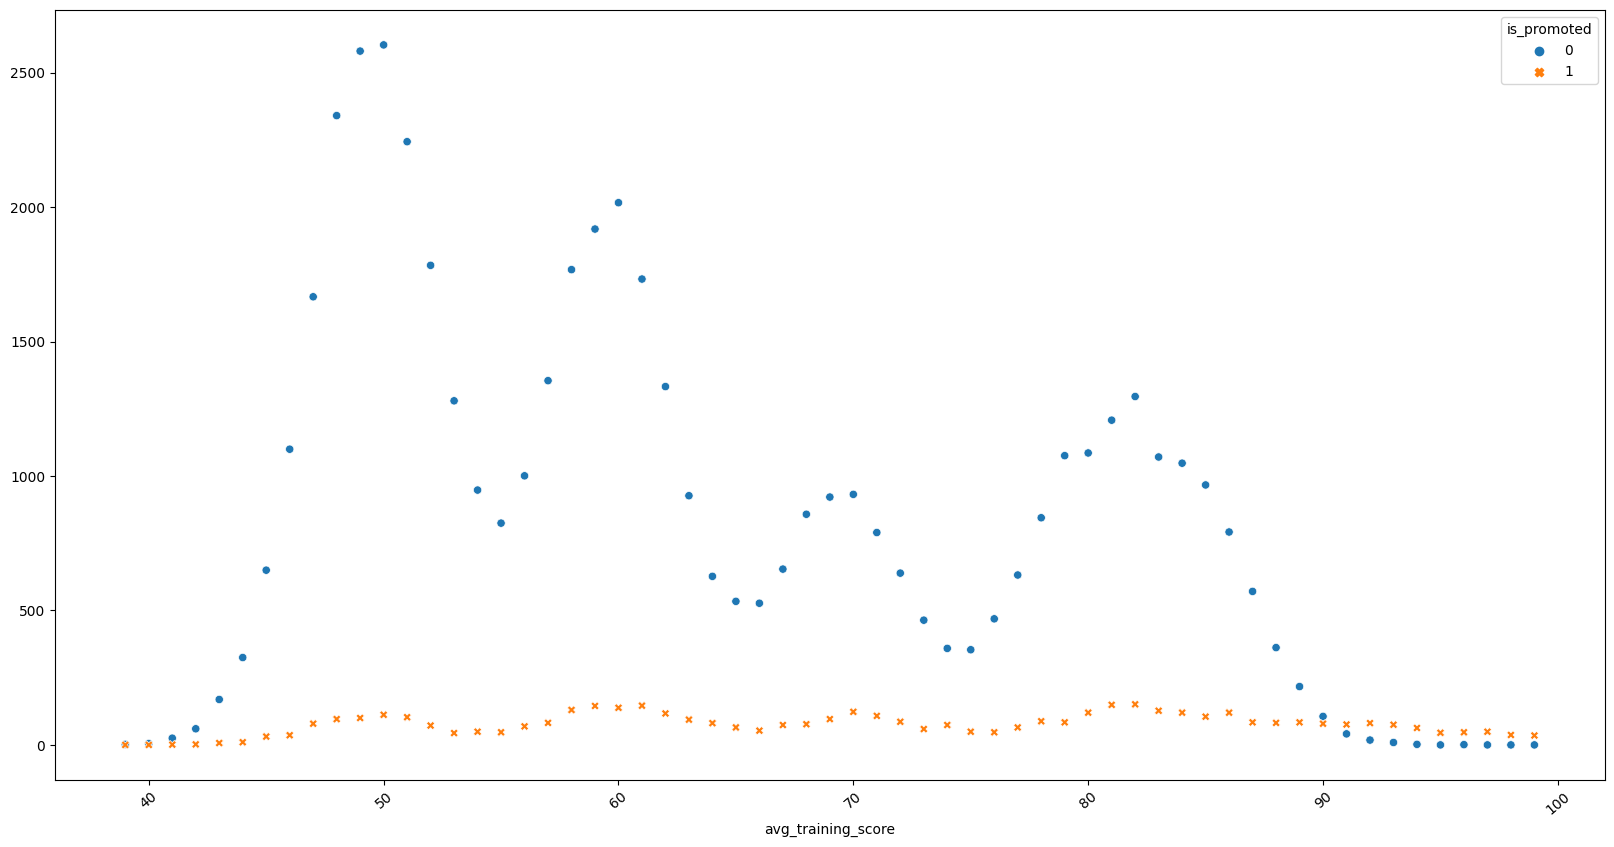

In [117]:
#Scatter plot between average training score and is_promoted
data = pd.crosstab(train['avg_training_score'], train['is_promoted'])
plt.rcParams['figure.figsize'] = (20, 10)
plt.xticks(rotation = 40)
sns.scatterplot(data)

# •	checking dependency of different regions in promotion===========#

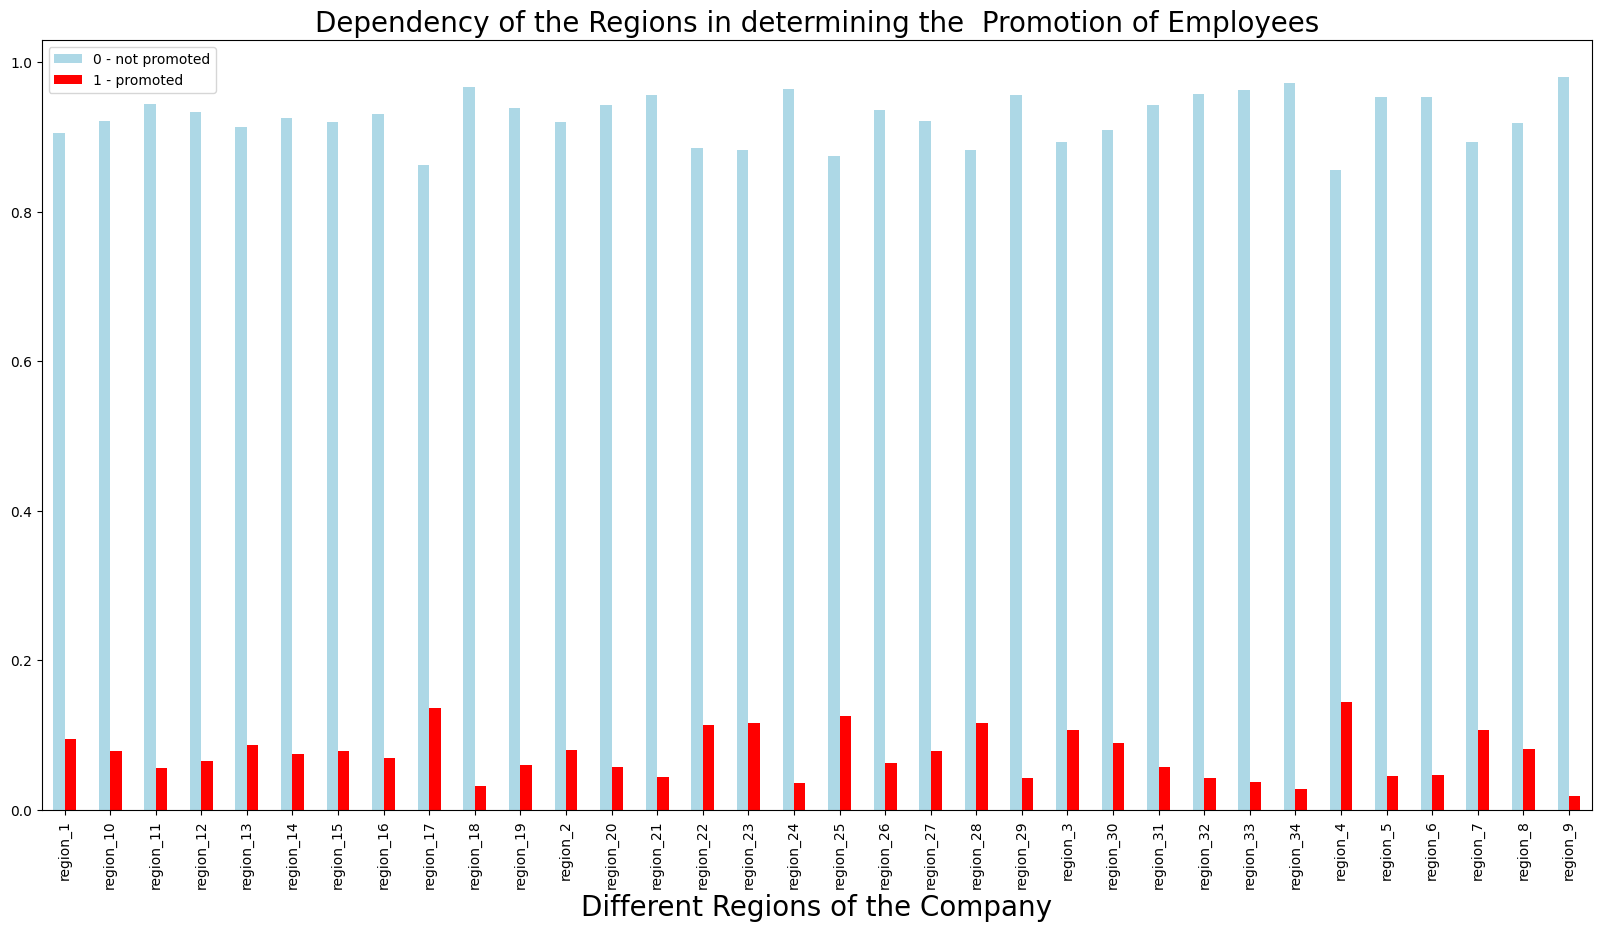

In [132]:
#Checking dependency of different regions in promotion
depend = pd.crosstab(train['region'], train['is_promoted'])
color=["lightblue","red"]
depend.div(depend.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = False, figsize = (20, 10),color=color)
plt.title('Dependency of the Regions in determining the  Promotion of Employees', fontsize = 20)
plt.xlabel('Different Regions of the Company', fontsize = 20)
labels=["0 - not promoted","1 - promoted"]
plt.legend(labels=labels)
plt.show()

# •	dependency of awards won on promotion  =====#

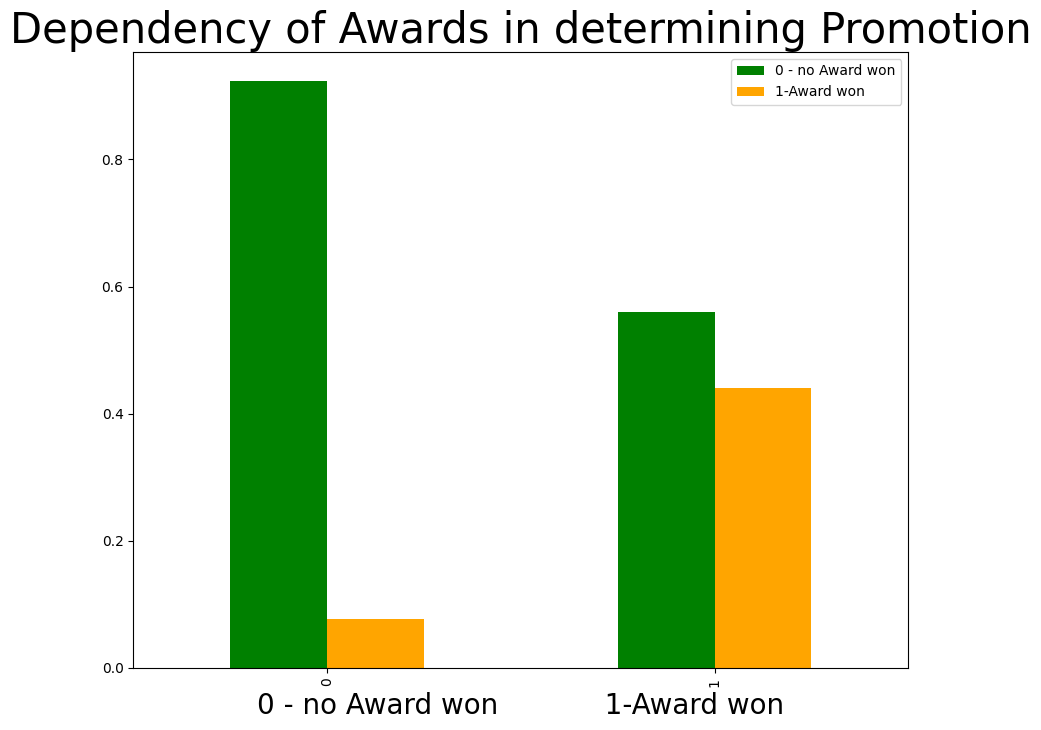

In [148]:
depend = pd.crosstab(train['awards_won?'], train['is_promoted'])
depend.div(depend.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = False, figsize = (10, 8), color = ['green', "orange"])
plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('0 - no Award won            1-Award won', fontsize = 20)
labels=["0 - no Award won",  "1-Award won"]
plt.legend(labels=labels)
plt.show()

# •	checking dependency of age factor in promotion of employees

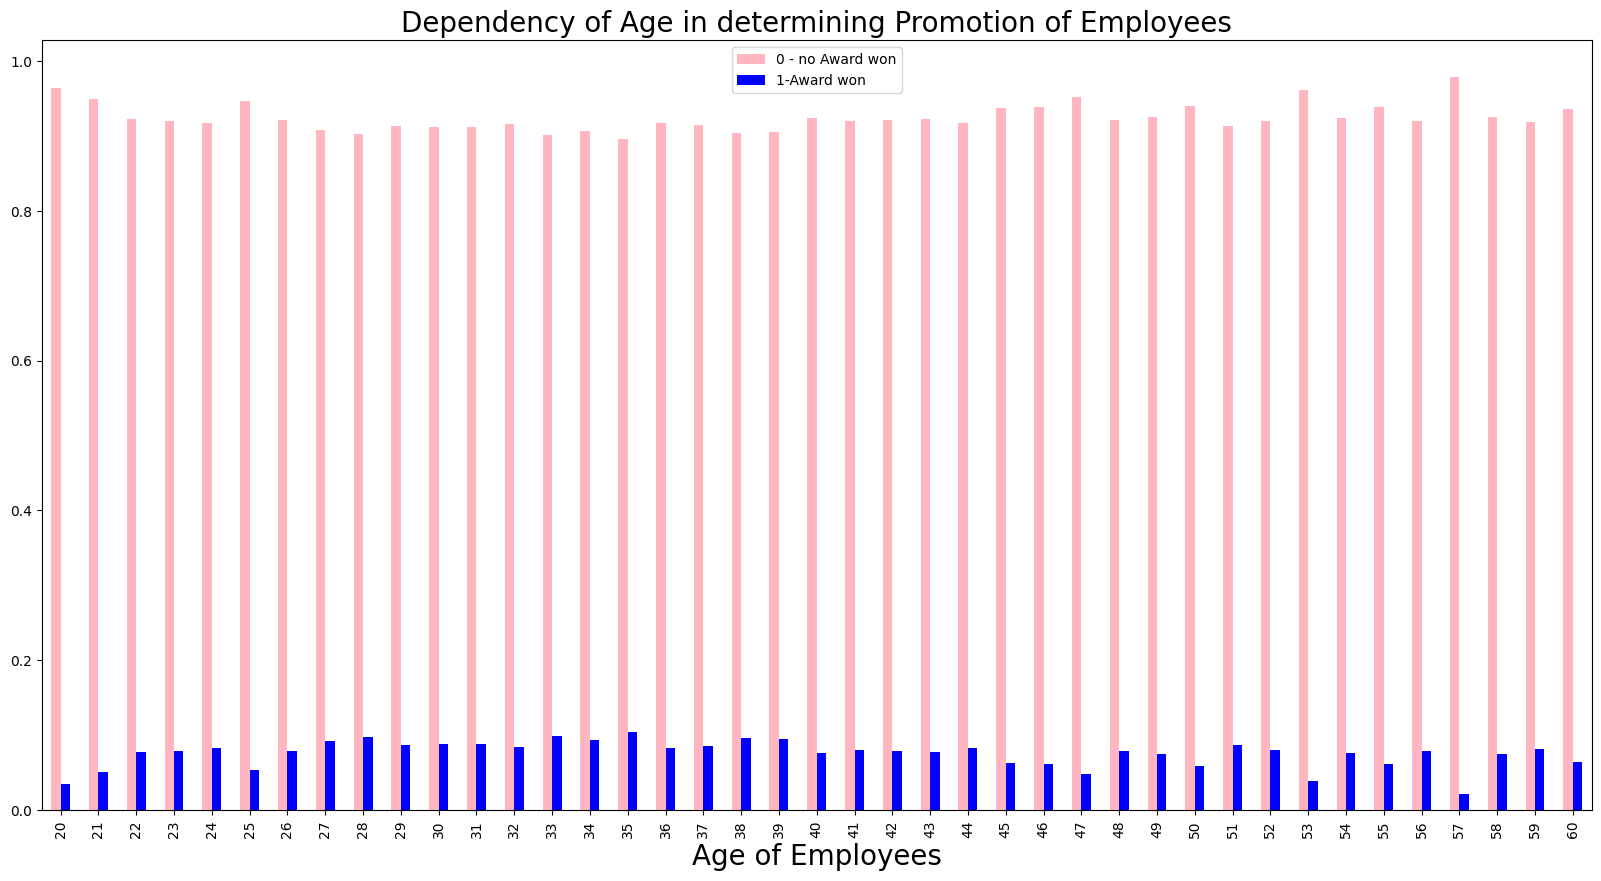

In [164]:
#Checking dependency of age factor in promotion of employees

depend = pd.crosstab(train['age'], train['is_promoted'])
depend.div(depend.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = False, figsize = (20, 10), color = ['lightpink', 'blue'])
plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 20)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend(labels=["0 - no Award won",  "1-Award won"])
plt.show()

# •	checking which department got the greatest number of promotions

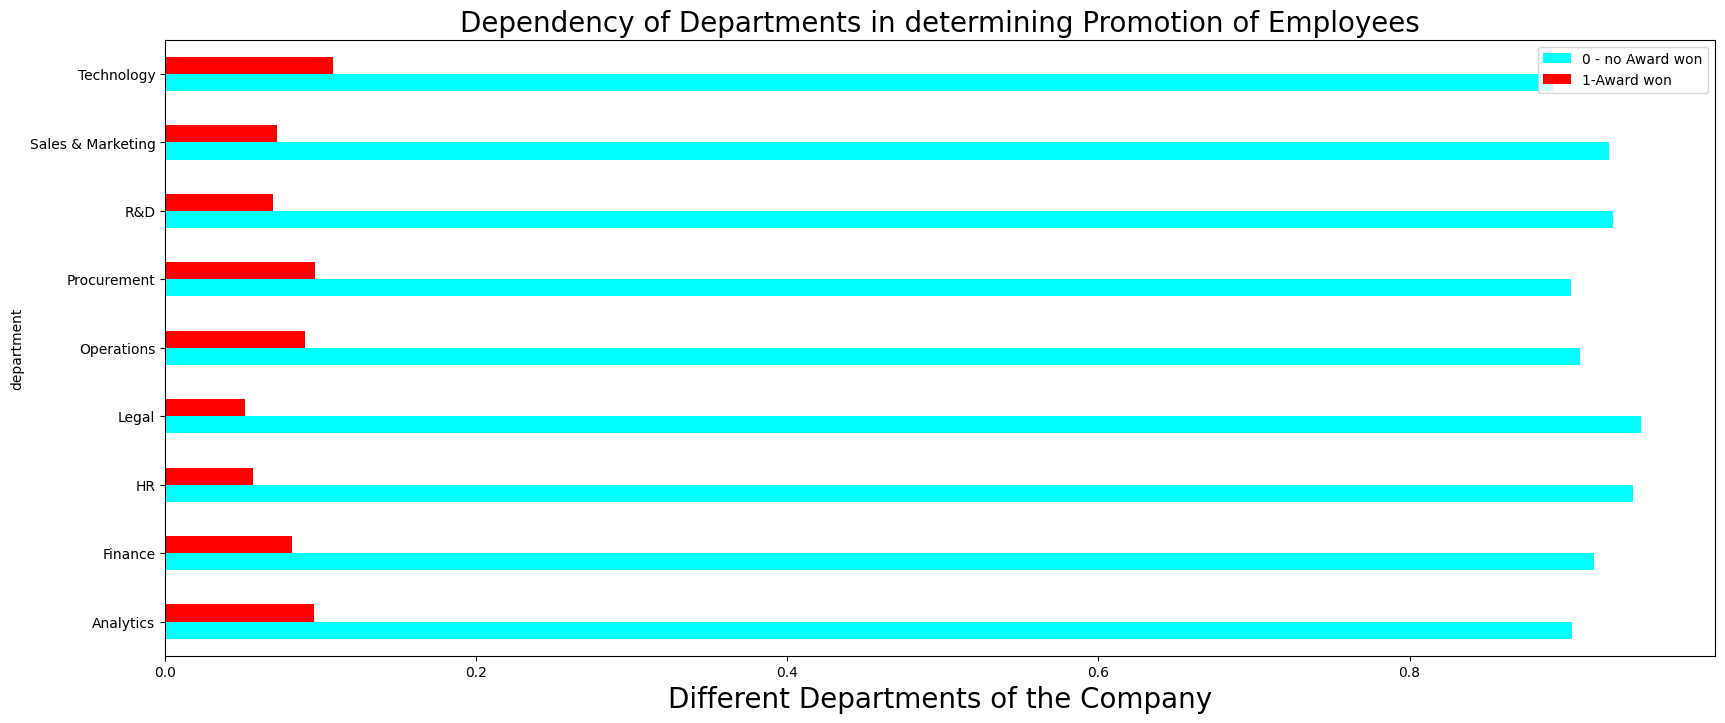

In [180]:
#Checking which department got most number of promotions

depend = pd.crosstab(train['department'], train['is_promoted'])
depend.div(depend.sum(1).astype('float'), axis = 0).plot(kind = 'barh', stacked = False, figsize = (20, 8), color = ['cyan', 'red'])
plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 20)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend(labels=["0 - no Award won",  "1-Award won"])
plt.show()

# •	checking dependency of gender over promotion

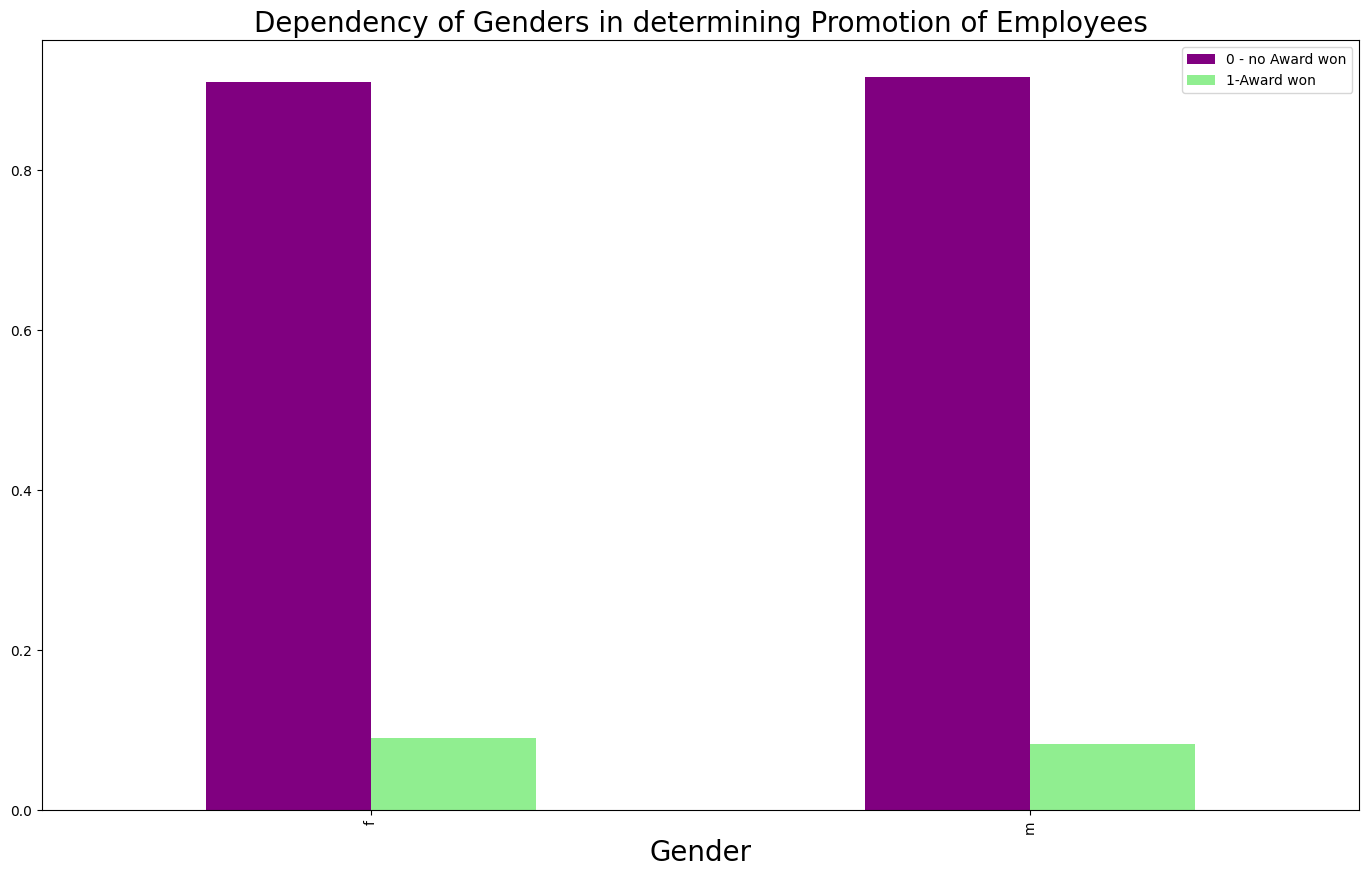

In [179]:
#Checking dependency of gender over promotion

depend = pd.crosstab(train['gender'], train['is_promoted'])
depend.div(depend.sum(1).astype('int'), axis = 0).plot(kind = 'bar', stacked = False, figsize = (17, 10), color = ['purple', 'lightgreen'])
plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 20)
plt.xlabel('Gender', fontsize = 20)
plt.legend(labels=["0 - no Award won",  "1-Award won"])
plt.show()